<a href="https://colab.research.google.com/github/shivaninehra/Colab/blob/main/Group3_Assosication_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By: Group 3**


* Goutham Kumar R (D20015)
* Kaviya U C      (D20018)
* Shivani Nehra   (D20031)


### **Problem Statement**:
FINAL PROBLEM STATEMENT <br/>
Based on the given dataset from logs of an online radio, 289,955 records of song (artist) are available made by 15000 users listening to the online radio.
We also have demographic information of the users available. 
Based on the listening patterns of the users, we are recommending new artists to the users within the online listening community.



### **Objective**:
Our objective is to build a recommendation system that recommends new music to users within the online radio listener's community. 


### **APPROACH**:-
We have used Association Rules Mining to assess the market basket. It is a popular technique in machine learning done on large retail 
or online data that discovers co-occurence relationships between activities performed by specific users. <br/>
The apriori algorithm helps us to find interesting rules or patterns based on strong rules.<br/>
Rules has three parts:-<br/>
Support, confidence and lift. <br/>
We have taken a rule as strong rule if:- <br/>
1. Minimum support  = 0.10
2. Minimum confidence  = 0.50
3. Minimum Lift =  5.0<br/>
Based on the records that have values greater than minimum support, 
confidence and lift are significant records for us. And help us in defining and accessing our recommendations. 

> we recommend Colab Notebook: https://colab.research.google.com/drive/1W36Z9FGDV7LcqHDSMUZib-itF7KGTlqt?usp=sharing

In [ ]:
#Library
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading file in colab
from google.colab import files 
  
  
uploaded = files.upload()

Saving lastfm (1).csv to lastfm (1).csv


In [ ]:
#reading file in colab
import io
df = pd.read_csv(io.BytesIO(uploaded['lastfm (1).csv']))

In [ ]:
#Load the data
df = pd.read_csv("lastfm (1).csv")
df = df[["user","artist"]]
df.sample(5)

,user,artist
245140,16677,otis redding
135601,9221,duffy
86147,5860,dragonforce
69128,4699,nine inch nails
126376,8575,ben folds


In [ ]:
#Adding a frequency column for groupby
df["Frequency"] = 1
df.head()

,user,artist,Frequency
0,1,red hot chili peppers,1
1,1,the black dahlia murder,1
2,1,goldfrapp,1
3,1,dropkick murphys,1
4,1,le tigre,1


In [ ]:
#checking for null value
df.isnull().sum() #no null values

user         0
artist       0
Frequency    0
dtype: int64

In [ ]:
#top 10 artists visual
import plotly.graph_objects as go
def distribution_plot(x,y,name=None,xaxis=None,yaxis=None):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(
        title_text=name,
        xaxis_title=xaxis,
        yaxis_title=yaxis
    )
    fig.show()
    
x = df['artist'].value_counts()  #artist count
x = x.sort_values(ascending = False)  #sorting the values
x = x[:10]  #top10

distribution_plot(x=x.index, y=x.values, yaxis="Count", xaxis="Artist")

In [ ]:
#total artist
A = df['artist'].unique()
print("Total artists: {}".format(len(A)))

Total artists: 1004


In [ ]:
df.drop_duplicates()#drop duplicates

,user,artist,Frequency
0,1,red hot chili peppers,1
1,1,the black dahlia murder,1
2,1,goldfrapp,1
3,1,dropkick murphys,1
4,1,le tigre,1
...,...,...,...
289950,19718,bob dylan,1
289951,19718,pixies,1
289952,19718,the clash,1
289953,19718,a tribe called quest,1


In [ ]:
#Incident matrix-> required for apriori algo
df = df.groupby(["user","artist"])["Frequency"].sum().unstack().reset_index().fillna(0).set_index("user")
df.head()

artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],a day to remember,a fine frenzy,a perfect circle,a tribe called quest,a-ha,abba,above & beyond,ac/dc,adam green,adele,adema,aerosmith,aesop rock,afi,after forever,against me!,agalloch,aimee mann,air,akira yamaoka,akon,akurat,al green,alanis morissette,alesana,alexisonfire,alice cooper,alice in chains,alicia keys,alkaline trio,...,tosca,toto,tracy chapman,travis,trentemøller,tricky,tristania,trivium,turbonegro,turisas,tv on the radio,type o negative,télépopmusik,u2,ulver,underoath,underworld,unkle,usher,vader,vampire weekend,van halen,van morrison,vangelis,various artists,velvet revolver,venetian snares,vnv nation,volbeat,weezer,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#since the apriori algo accept only 1s and 0s , changing all values >=1 to 1s
def enc(x):
    if x >= 1 :
        return 1
    else:
        return 0
    
df = df .applymap(enc)  #applying the fn to df
df.head()

artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],a day to remember,a fine frenzy,a perfect circle,a tribe called quest,a-ha,abba,above & beyond,ac/dc,adam green,adele,adema,aerosmith,aesop rock,afi,after forever,against me!,agalloch,aimee mann,air,akira yamaoka,akon,akurat,al green,alanis morissette,alesana,alexisonfire,alice cooper,alice in chains,alicia keys,alkaline trio,...,tosca,toto,tracy chapman,travis,trentemøller,tricky,tristania,trivium,turbonegro,turisas,tv on the radio,type o negative,télépopmusik,u2,ulver,underoath,underworld,unkle,usher,vader,vampire weekend,van halen,van morrison,vangelis,various artists,velvet revolver,venetian snares,vnv nation,volbeat,weezer,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#get the most freq itemsets. #default value min support = 0.10
freq_itemset = apriori(df =df, min_support=0.10, use_colnames=True)
freq_itemset

,support,itemsets
0,0.158533,(coldplay)
1,0.111333,(metallica)
2,0.114067,(muse)
3,0.104933,(pink floyd)
4,0.180267,(radiohead)
5,0.119067,(red hot chili peppers)
6,0.177867,(the beatles)


In [ ]:
#since we have very few artist list, we will reduce the min support to 0.08.
freq_itemset = apriori(df =df, min_support=0.08, use_colnames=True)
freq_itemset

,support,itemsets
0,0.158533,(coldplay)
1,0.081333,(death cab for cutie)
2,0.098200,(linkin park)
3,0.111333,(metallica)
4,0.114067,(muse)
5,0.098200,(nirvana)
6,0.104933,(pink floyd)
7,0.180267,(radiohead)
8,0.119067,(red hot chili peppers)
9,0.091000,(system of a down)


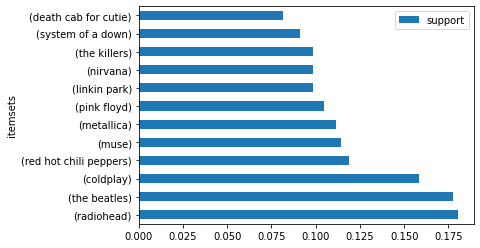

In [ ]:
#plotinng the freqent itemlist
freq_itemset = freq_itemset.sort_values(by='support',ascending=False)  #sorting
freq_itemset.set_index("itemsets").plot(kind = "barh", use_index= True)  #plotting

In [ ]:
#get the most freq itemsets. #min support = 0.01 #for further analysis
freq_itemset = apriori(df =df, min_support=0.01, use_colnames=True)
freq_itemset['length'] = freq_itemset['itemsets'].apply(lambda x: len(x))
freq_itemset

,support,itemsets,length
0,0.022733,(2pac),1
1,0.030933,(3 doors down),1
2,0.032800,(30 seconds to mars),1
3,0.021800,(50 cent),1
4,0.013667,(65daysofstatic),1
...,...,...,...
1684,0.010600,"(radiohead, the rolling stones, the beatles)",3
1685,0.010667,"(radiohead, the shins, the beatles)",3
1686,0.011467,"(radiohead, the smashing pumpkins, the beatles)",3
1687,0.010467,"(radiohead, the beatles, the strokes)",3


In [ ]:
#generating assosciation rules 
rule = association_rules(freq_itemset, min_threshold=0.50)#by default the metric is 'confidence'
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beck),(radiohead),0.057467,0.180267,0.029267,0.509281,2.825152,0.018907,1.670473
1,(blur),(radiohead),0.033533,0.180267,0.017533,0.522863,2.900496,0.011488,1.718024
2,(broken social scene),(radiohead),0.027533,0.180267,0.015067,0.547215,3.035589,0.010103,1.810427
3,(keane),(coldplay),0.034933,0.158533,0.022267,0.637405,4.020634,0.016729,2.320676
4,(snow patrol),(coldplay),0.050400,0.158533,0.026467,0.525132,3.312441,0.018477,1.772002
5,(the fray),(coldplay),0.021800,0.158533,0.011267,0.516820,3.260006,0.007811,1.741516
6,(travis),(coldplay),0.024400,0.158533,0.013733,0.562842,3.550304,0.009865,1.924855
7,(judas priest),(iron maiden),0.026667,0.059267,0.013533,0.507500,8.562992,0.011953,1.910118
8,(t.i.),(kanye west),0.018333,0.064067,0.010400,0.567273,8.854413,0.009225,2.162871
9,(megadeth),(metallica),0.030800,0.111333,0.016267,0.528139,4.743759,0.012838,1.883321


In [ ]:
#sorting the rule df by LIFT
rule = rule.sort_values(by='lift',ascending=False)
rule = rule[(rule[("lift")]>5)]  #subsetting the rule df by Min_lift = 5.
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(the pussycat dolls),(rihanna),0.018000,0.043067,0.010400,0.577778,13.415893,0.009625,2.266421
8,(t.i.),(kanye west),0.018333,0.064067,0.010400,0.567273,8.854413,0.009225,2.162871
7,(judas priest),(iron maiden),0.026667,0.059267,0.013533,0.507500,8.562992,0.011953,1.910118
10,(sonata arctica),(nightwish),0.026400,0.061933,0.013467,0.510101,8.236292,0.011832,1.914816
39,"(the doors, pink floyd)",(led zeppelin),0.019800,0.079200,0.010667,0.538721,6.802027,0.009099,1.996187
38,"(led zeppelin, the doors)",(pink floyd),0.017867,0.104933,0.010667,0.597015,5.689469,0.008792,2.221091


### OBSERVATIONS

From the above  analysis we have found ,The most heard bands are **"The Radioheads" and "The Beatles".**

Also, from the above table, we have found out top 6 strong associated rules.<br/>
Based on minumum support, confidence and lift mentioned in the approach. 
1. The strength of the rule, **The pussycat dolls  -> Rihanna** is the maximum with lift as 13.41.  
2. There is a high chance of listening to following artists together **the doors, pink floyd, led zeppelin** as the lift for different combination of antecedent and consequent have lift greater than 5. 
 

### POSSIBLE ACTIONS



Possible actions based on recommending artists to different online FM listeners can be decided on the demographic factors like Sex and Country. <br/>

We also can find top artists in different areas based on user's listening patterns. 

### CONCLUSION

Association rules mining is thus the correct approach to use for recommendations of products like in this case we are recommending following artists to the listeners of the online radio:- 

1. **(the pussycat dolls) ->	(rihanna)**
2. 	**(t.i.) ->	(kanye west)**
3.	**(judas priest)	->(iron maiden)**
4.	**(sonata arctica)->	(nightwish)**	
5.	**(the doors, pink floyd)	->(led zeppelin)**	
6.	**(led zeppelin, the doors)-> 	(pink floyd)**
 